Generating the coverage figure...


Text(0.5, 0.2, '4000 predictor steps \n20 corrector steps\nsnr=0.1')

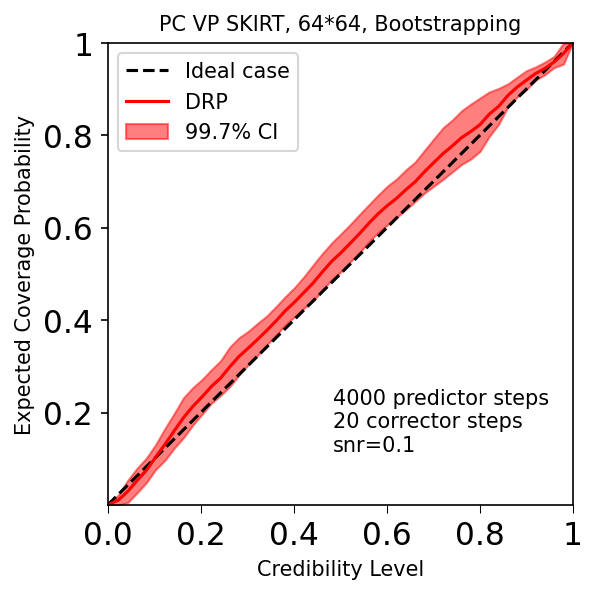

In [14]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scienceplots
import numpy as np
import json
 # Need SciencePLots
params = {
         'axes.labelsize': 10,
         'axes.titlesize': 10,
         'ytick.labelsize' : 15,
         'xtick.labelsize' : 15,
         'xtick.major.size': 4,
         'xtick.minor.size': 4,
         'xtick.major.width': 0.5,
         'xtick.minor.width': 0.5,
         'ytick.color': "k",
         'xtick.color': "k",
         'axes.labelcolor': "k",
         'ytick.labelcolor' : "k",
         'xtick.labelcolor' : "k",
         }
pylab.rcParams.update(params)


data_dir = "../../../data/tarp_data/"
json_file = "skirt64_postneurips_pc.json"
npz_file = "tarp_bootstrapping_pc_skirt64_postneurips_pc_500sims_500samples.npz"
with open(data_dir+json_file, 'r') as jf:
    json_data = json.load(jf)

# Loading the data
npz_data = np.load(data_dir + npz_file)
alpha = npz_data["alpha"]
ecp = npz_data["ecp"]
ecp_std = npz_data["ecp_std"]
factor_uncertainty = 3




# print("Generating the coverage figure...")
# labels = [0., 0.2, 0.4, 0.6, 0.8, 1]
# fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi = 150)
# ax.plot([0, 1], [0, 1], ls='--', color='k', label = "Ideal case")
# ax.plot(alpha, ecp, label='DRP', color = "red")
# ax.fill_between(alpha, ecp - factor_uncertainty * ecp_std, ecp + factor_uncertainty * ecp_std, alpha = 0.5, color = "red", label = "99.7% CI")
# ax.legend()
# ax.set_xlabel("Credibility Level")
# ax.set_ylabel("Expected Coverage Probability")
# ax.set_xticks(labels)
# ax.set_xticklabels(labels)
# ax.set_yticks(labels[1:])
# ax.set_yticklabels(labels[1:])
# ax.set(xlim = [0, 1], ylim = [0, 1])


# plt.title("PC VP SKIRT, 64*64, Bootstrapping")
# fig.text(x = 0.5, y = 0.2, s= "4000 predictor steps \n20 corrector steps\nsnr=0.1")

# save_dir = "C:/Users/noedi/Desktop/Ciela/Projects/bayesian_imaging_radio/data/tarp_data/plot"
# plt.savefig(save_dir +  "f.pdf", bbox_inches = "tight", pad_inches = 0.2)

In [15]:
def extract_tarp_params_json(json_file): 
    with open(json_file, 'r') as jf:
        json_data = json.load(jf)
    
    

{'num_samples': 500,
 'num_sims': 500,
 'model_pixels': 64,
 'dataset': 'skirt',
 'sde': 'VP',
 'experiment_name': 'skirt64_postneurips_pc',
 'sampling_params': [4000, 20, 0.1]}

In [1]:
import score_models
from score_models import ScoreModel
import torch
import matplotlib.pyplot as plt

In [2]:
file = "../../score_models/ncsnpp_vp_skirt_y_64_230813225149/"
score_model = ScoreModel(checkpoints_directory = file)

Using the Variance Preserving SDE


In [3]:
sample = score_model.sample(shape = [1, 1, 64, 64], steps = 500)

Sampling from the prior | t = 0.0 | sigma = 7.8e-03| scale ~ 8.1e+00: 100%|██████████| 500/500 [00:21<00:00, 23.31it/s]


In [4]:
t[i]

NameError: name 't' is not defined

tensor([[[[-0.0509,  0.0764, -0.0665,  ...,  0.0052, -0.0455, -0.0069],
          [ 0.0095,  0.0164,  0.0176,  ...,  0.0612, -0.0239, -0.0296],
          [-0.0366, -0.0339, -0.0207,  ..., -0.0632,  0.0799, -0.0451],
          ...,
          [ 0.0297,  0.1371, -0.0588,  ...,  0.0369, -0.0347, -0.0127],
          [-0.0409, -0.0658, -0.0477,  ..., -0.0478, -0.0425, -0.0324],
          [ 0.0145, -0.0095, -0.0331,  ...,  0.0737, -0.0577, -0.0141]]]],
       device='cuda:0')
tensor([[[[-0.0183,  0.2394, -0.3593,  ...,  0.0214, -0.2340,  0.0240],
          [ 0.0906, -0.1903,  0.0396,  ...,  0.1237,  0.0367, -0.0297],
          [-0.1778,  0.0336, -0.1402,  ..., -0.1087,  0.2270,  0.2497],
          ...,
          [ 0.0486, -0.1629, -0.0013,  ...,  0.1371,  0.1757,  0.1429],
          [-0.0974, -0.2615,  0.0506,  ..., -0.0371, -0.0983,  0.0391],
          [ 0.1788,  0.1005, -0.1121,  ...,  0.2712,  0.0912,  0.0325]]]],
       device='cuda:0')
tensor([[[[ 0.2925,  0.5101, -0.0590,  ...,  0.0775,

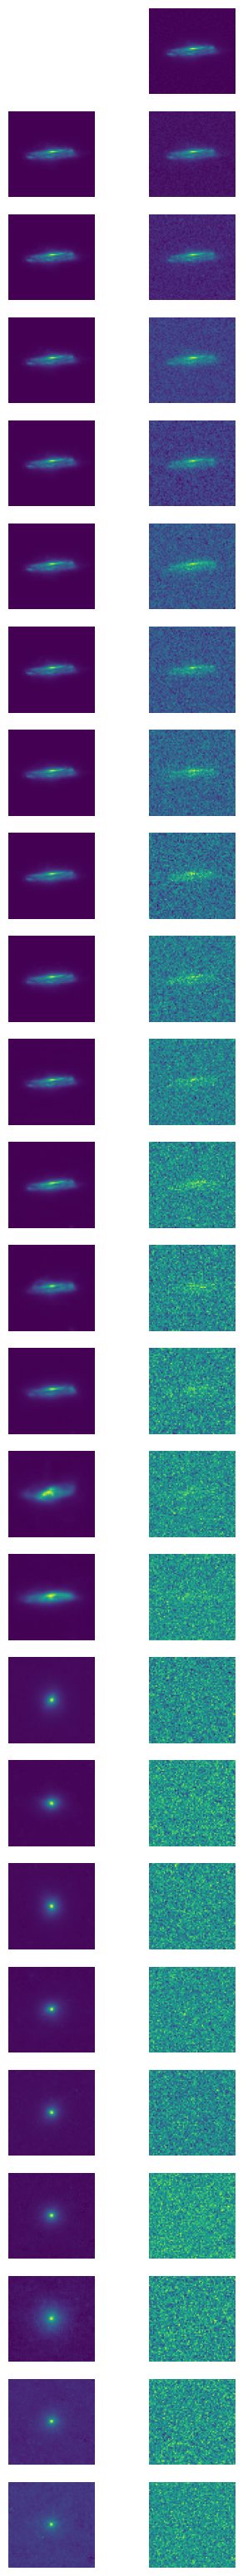

In [5]:
fig, axs = plt.subplots(25, 2, figsize = (4, 40))


t = torch.linspace(0, 1, 25).to(device = sample.device)

for i in range(25): 
    z = torch.randn_like(sample)
    mu, sigma = score_model.sde.marginal_prob_scalars(t[i])
    x_t = mu * sample + sigma * z
    print(x_t)
    x_0 = (x_t + sigma**2 * score_model.score(t[i].unsqueeze(dim = 0), x_t)) / mu
    axs[i, 0].imshow(x_0.detach().squeeze().cpu())
    axs[i, 1].imshow(x_t.detach().squeeze().cpu())
    axs[i, 0].axis("off")
    axs[i, 1].axis("off")
    


In [ ]:
np.load(tarp_data)